In [1]:
#Adventure Project
# Dependencies
import csv
import numpy as np
import pandas as pd
import requests
import scipy.stats as stats
from matplotlib import pyplot as plt

#from config import (api_key, gkey) #api_key

In [2]:
# Australian Population vs Underemployment Over Industries
# Ref.:ABS Data 6291019 -'Underemployed persons by Industry division/Occupation major group of main job and Sex.

#read csv files
underempl_final = pd.read_csv (r'Resources\underempl_final.csv')
underempl_gender_ratio = pd.read_csv (r'Resources\underempl_gender_ratio.csv')
population = pd.read_csv (r'Resources\populationaus.csv')


In [3]:
#Preview Data 1 - "Underemployed persons by Industry.""
under_df = pd.DataFrame(underempl_final)
under_df = under_df.set_index(['Year'])
under_df_tr =  under_df.T
# under_df_tr.head()

In [4]:
#Preview Data 2 - Underemployment ratio (proportion of employed) by Gender
under_gender_df = pd.DataFrame(underempl_gender_ratio)
under_gender_df = under_gender_df.set_index(['Year'])
under_gender_df_tr = under_gender_df.T.head()
# under_gender_df_tr

In [5]:
#Preview Data 3 - Australia Population (2012 -2018)
#Remove data for states as n/a
au_pop_df = pd.DataFrame(population)
au_pop_df = au_pop_df.set_index(['Year'])
au_pop_df = au_pop_df.drop(['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'], axis=1)
au_pop_df = au_pop_df/1000
au_pop_df_tr = au_pop_df.T
# au_pop_df_tr

In [6]:
# Get Yearly change rate (base year 2012) for Data 1 - 'Underemployed persons by Industry...'
# Loc index rows to create new data frame to hold Yearly change calculation
# Calculate yearly change ( YC = year - baseyear)*100/baseyear

under_perc_df = under_df_tr.iloc[:,1:1]

under_perc_df["(2012 - 2013)"] = (under_df_tr[2013] - under_df_tr[2012] )*100/under_df_tr[2012]
under_perc_df["(2012 - 2014)"] = (under_df_tr[2014] - under_df_tr[2012] )*100/under_df_tr[2012]
under_perc_df["(2012 - 2015)"] = (under_df_tr[2015] - under_df_tr[2012] )*100/under_df_tr[2012]
under_perc_df["(2012 - 2016)"] = (under_df_tr[2016] - under_df_tr[2012] )*100/under_df_tr[2012]
under_perc_df["(2012 - 2017)"] = (under_df_tr[2017] - under_df_tr[2012] )*100/under_df_tr[2012]
under_perc_df["(2012 - 2018)"] = (under_df_tr[2018] - under_df_tr[2012] )*100/under_df_tr[2012]

#Preview data
under_perc_df.head()

# # format columns values by 2f >>
under_perc_df_formated = under_perc_df.applymap('{:.2f}%'.format)
under_perc_df_formated.head()

Year,(2012 - 2013),(2012 - 2014),(2012 - 2015),(2012 - 2016),(2012 - 2017),(2012 - 2018)
Agriculture (empl - TM),7.01%,6.95%,5.52%,-2.03%,7.61%,10.67%
Agriculture (empl - Males),10.98%,7.51%,6.15%,-0.29%,9.56%,16.83%
Agriculture (empl - Females),-1.67%,5.63%,4.06%,-5.83%,3.23%,-2.60%
Agriculture(Underempl - TM),63.93%,57.38%,-6.56%,62.30%,9.84%,54.10%
Agriculture (Underempl - Males),80.33%,93.44%,-24.59%,86.89%,18.03%,98.36%


In [7]:
# Get Yearly change rate (base year 2012) for Data 3 - 'Australia Population '

# Loc index rows to create new data frame to hold Yearly change calculation values
# Calculate yearly change ( YC = year - baseyear)*100/baseyear

au_pop_df = au_pop_df.T
pop_perc_df = au_pop_df.iloc[:,1:1]
pop_perc_df
pop_perc_df["(2012 - 2013)"] = (au_pop_df_tr[2013] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]
pop_perc_df["(2012 - 2014)"] = (au_pop_df_tr[2014] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]
pop_perc_df["(2012 - 2015)"] = (au_pop_df_tr[2015] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]
pop_perc_df["(2012 - 2016)"] = (au_pop_df_tr[2016] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]
pop_perc_df["(2012 - 2017)"] = (au_pop_df_tr[2017] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]
pop_perc_df["(2012 - 2018)"] = (au_pop_df_tr[2018] - au_pop_df_tr[2012] )*100/au_pop_df_tr[2012]

# # # Preview data
pop_perc_df

# # format columns values by 2f >>
pop_perc_formated = pop_perc_df.applymap('{:.2f}%'.format)
pop_perc_formated


Year,(2012 - 2013),(2012 - 2014),(2012 - 2015),(2012 - 2016),(2012 - 2017),(2012 - 2018)
AUS,3.44%,4.96%,6.49%,8.29%,10.00%,11.76%


#### Pearson’s Correlation (AU Population vs Underemployment)

In [8]:
pop_perc_df_tr = pop_perc_df.T
x = pop_perc_df_tr['AUS']

under_perc_df_tr=under_perc_df.T
y = under_perc_df_tr['Underemployed Total (M)']

from scipy.stats import pearsonr
corr, _ = pearsonr(x, y)
print('Pearsons correlation is  %.3f' % corr + ' showing positive correlation between population and Underemployment variables ')


Pearsons correlation is  0.812 showing positive correlation between population and Underemployment variables 


#### Figure 1. AU Population Growth vs Total Underemployment Over Industries

In [9]:
# Create new df get Total Undemployment Over Industries 
under_perc_ind_df = under_perc_df.iloc[243:249,0:7]
under_perc_ind_df = under_perc_ind_df.T 


#merge dataframes (Population and Total Undemployment Over Industries )
#remove unnecessary columns 


merged_pop_total_under = pop_perc_df_tr.merge(under_perc_ind_df, on=['Year'])
figure1_data = merged_pop_total_under.drop(['Employed Total - Males','Employed Total -  Females ', 
       'Underemployed total - Males', 'Underemployed total - Females'], axis=1)

figure1_data = figure1_data.rename(columns={'AUS':'Australian Population','Employed Total (M)':'Total Employed)', 'Underemployed Total (M)':'Total Underemployed '})

#preview data
figure1_data

# # format columns values by 2f >>
figure1_data_formated = figure1_data.applymap('{:.2f}%'.format)
figure1_data_formated

,Australian Population,Total Employed),Total Underemployed
Year,,,
(2012 - 2013),3.44%,0.59%,7.17%
(2012 - 2014),4.96%,1.79%,25.36%
(2012 - 2015),6.49%,4.90%,27.05%
(2012 - 2016),8.29%,5.94%,26.48%
(2012 - 2017),10.00%,9.45%,30.02%
(2012 - 2018),11.76%,11.98%,32.19%


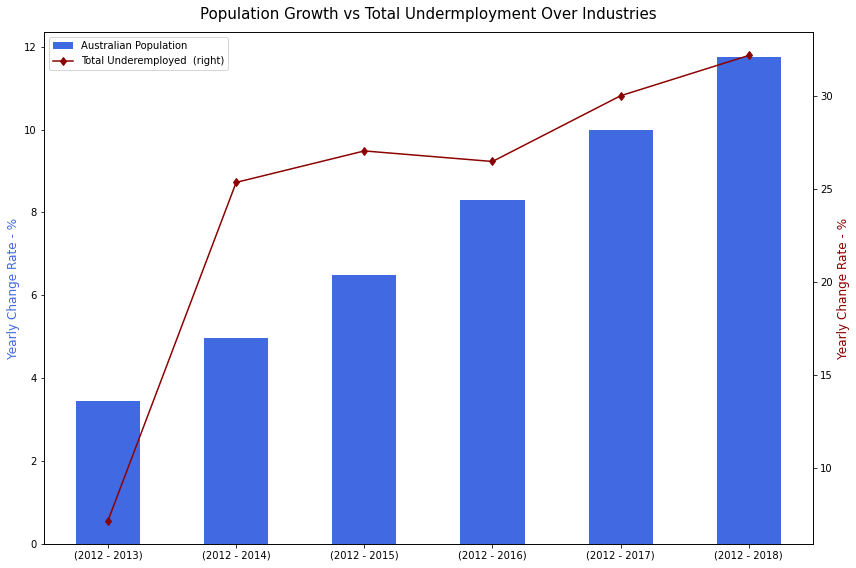

In [10]:
# Plot data
figure1_data.index.names = ['']
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.suptitle('Population Growth vs Total Undermployment Over Industries', fontsize=15)
figure1_data['Australian Population'].plot(kind='bar', color='royalblue',legend= True)
figure1_data['Total Underemployed '].plot(kind='line', marker='d',color='darkred',secondary_y=True, legend= True,)

plt.ylabel('Yearly Change Rate - %', color='darkred',fontsize=12)
ax1.set_ylabel('Yearly Change Rate - %', color='royalblue',fontsize=12)



plt.tight_layout()
plt.savefig("results/Pop_vs_Underemployment_ind")



#### Figure 2 - AU Population Growth vs Total Undermployment  By Gender

In [11]:
#merge yearly change dataframes (Population and Selected data for gender plot )
#remove unnecessary columns
merged_pop_total_under = pop_perc_df_tr.merge(under_perc_ind_df, on=['Year'])
figure2_data = merged_pop_total_under.drop(['Employed Total - Males','Employed Total -  Females ','Employed Total (M)', 'Underemployed Total (M)'], axis=1)

#preview data
figure2_data

#rename columns for better display
figure2_data = figure2_data.rename(columns={'AUS':'Australian Population',
                              'Underemployed total - Males':'Underemployed - Males',
                              'Underemployed total - Females':'Underemployed - Females',})

figure2_final = figure2_data
figure2_final

# # format columns values by 2f >>
figure2_data_formated = figure2_final.applymap('{:.2f}%'.format)
figure2_data_formated

,Australian Population,Underemployed - Males,Underemployed - Females
Year,,,
(2012 - 2013),3.44%,8.95%,6.00%
(2012 - 2014),4.96%,30.90%,21.68%
(2012 - 2015),6.49%,31.72%,23.98%
(2012 - 2016),8.29%,32.41%,22.55%
(2012 - 2017),10.00%,36.16%,25.96%
(2012 - 2018),11.76%,37.59%,28.63%


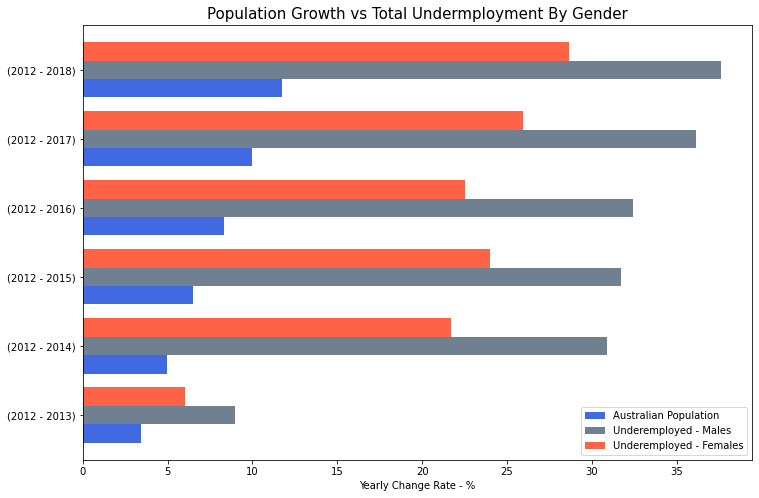

In [12]:
#Plot figure2_data

figure2_final.index.names = ['']
my_colors = 'royalblue', 'slategray', 'tomato'
figure2_final.plot(kind='barh',figsize=(12,8),width=0.8,color=my_colors)
plt.title("Population Growth vs Total Undermployment By Gender",fontsize=15)
plt.xlabel("Yearly Change Rate - %")
plt.savefig("results/Pop_vs_Under_by_Gender")


plt.show()

#### Figure 3 - AU Population Growth vs Underemployment by Industry Division

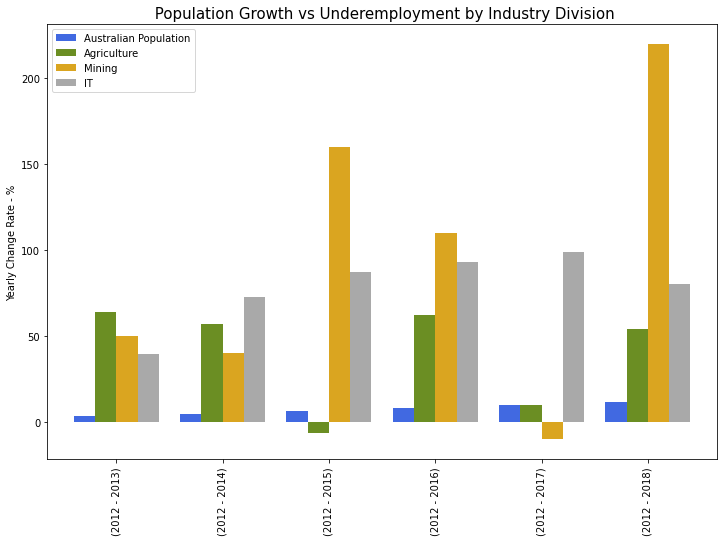

In [13]:
#Make list of all Underemployed category for each industry
# print(list(under_perc_df.index)) ## to  get all categories listed in the index

selected_columns = ['Agriculture(Underempl - TM)',
                    'Mining (Underempl - TM)', 
                    'Manufacturing (Underempl - TM)',
                    'Electricity, Gas, Water and Waste Services (Underempl - TM)', 
                    'Construction (Underempl - TM)',
                    'Wholesale Trade (Underempl - TM)',
                    'Retail Trade (Underempl - TM)',            
                    'Accommodation and Food Services (Underempl - TM)',
                    'Information Media and Telecommunications (Underempl - TM)',  
                    'Financial (Underempl - TM)', 
                   'Rental, Hiring and Real Estate Services (Underempl - TM)',  
                   'Professional, Scientific and Technical Services (Underempl - TM)',
                    'Administrative and Support Services  (Underempl - TM)', 
                    'Administrative and Support Services (Underempl ratio - Males )', 
                     'Public Administration and Safety (Underempl - TM)',
                   'Education and Training (Underempl - TM)', 
                    'Health Care and Social Assistance (Underempl - TM)',
                    'Arts and Recreation Services (Underempl - TM)',
                    'Other Services (Underempl - TM)', 
                    'Managers (Underempl - TM)', 
                    'Technicians and Trades Workers (Underempl - TM)',
                    'Community and Personal Service Workers (Underempl - TM)',
                    'Clerical and Administrative Workers (Underempl - TM)',
                    'Sales Workers (Underempl - TM)', 
                    'Machinery Operators and Drivers (Underempl - TM)', 
                    'Labourers (empl - Females)', 'Labourers  (Underempl - TM)']

# Create a new data frame to hold the categories values for ploting
selected_ocupations_df = under_perc_df.loc[selected_columns]
ocupations_df = selected_ocupations_df

#Get top 3 ocupations with hightes % change 
top_3_perc_change_ocupations = ocupations_df.nlargest(3,['(2012 - 2013)', '(2012 - 2014)', '(2012 - 2015)', '(2012 - 2016)',
       '(2012 - 2017)', '(2012 - 2018)'])
top_3_perc_change_ocupations_tr = top_3_perc_change_ocupations.T

#rename columns for better display
top_3_perc_change_ocupations_tr = top_3_perc_change_ocupations_tr.rename(columns={'Agriculture(Underempl - TM)':'Agriculture',
                              'Mining (Underempl - TM)':'Mining',
                              'Manufacturing (Underempl - TM)':'Manufacturing',
                              'Information Media and Telecommunications (Underempl - TM)':'IT',
                              'Managers (Underempl - TM)':'Managers',
                              'Electricity, Gas, Water and Waste Services (Underempl - TM)':'Electricity, Gas, Water and Waste Services ',
                              'Professional, Scientific and Technical Services (Underempl - TM)':'Professional, Scientific and Technical Services'})

top_3_perc_final = top_3_perc_change_ocupations_tr
top_3_perc_final

merged_pop_ocupation = pop_perc_df_tr.merge(top_3_perc_final, on=['Year'])
merged_pop_ocupation = merged_pop_ocupation.rename(columns={'AUS':'Australian Population'})

#Plot Horizontal Bar Chart
merged_pop_ocupation.index.names = ['']
my_colors = 'royalblue', 'olivedrab', 'goldenrod','darkgrey'
merged_pop_ocupation.plot(kind='bar',figsize=(12,8),width=0.8, color=my_colors)
plt.title(" Population Growth vs Underemployment by Industry Division",fontsize=15)
plt.savefig("results/Pop_vs_top3_industries")
plt.ylabel("Yearly Change Rate - %")
plt.show()

In [14]:
stast = merged_pop_ocupation
stast = stast.describe()

# # format columns values by 2f >>
stast_formated = stast.applymap('{:.2f}'.format)
stast_formated

,Australian Population,Agriculture,Mining,IT
count,6.00,6.00,6.00,6.00
mean,7.49,40.16,95.00,78.79
std,3.13,30.49,85.03,21.21
min,3.44,-6.56,-10.00,39.77
25%,5.35,20.90,42.50,74.72
50%,7.39,55.74,80.00,84.09
75%,9.57,61.07,147.50,91.76
max,11.76,63.93,220.00,98.86


#### Background 
For this section, a preliminary data analysis was undertaken for the years 2012 – 2018 to identify the relationship between Population growth and Underemployment rate by industries.

Only data for employed people was considered and analysed for the rate of underemployment, as per definition below from Australian Bureau of Statistics (ABS) (1). 

     “The Australian Bureau of Statistics (ABS) identifies two distinct groups as underemployed:
        -part-time workers who wanted to work more hours and could start additional hours either in the reference week or in the subsequent four weeks; and
        -full-time workers who worked part-time hours in the reference week for economic reasons (such as being stood down or insufficient work being available). It is assumed these people wanted to work full-time and would have done so, had the work been available.” 

In terms of correlation, taking into account the data analysis 'Underemployment - Australian Social Trends' realised in June 2010 (2):

    “Although underemployed workers make up a small proportion of employed people, underemployment has been increasing over the last 30 years. Unlike the unemployment rate, which rises and falls with the business cycle, historically, the underemployment rate has tended to rise in economic downturns but not recover as quickly when the economy begins to improve.” (2)

Based on the above, we would expect in our preliminary analysis to find a level of correlation for the two variables for the period of 2012 - 2018. 


#### Data Collection and manipulation 

From the several datasets available from ABS, the “6291019 - Table 19. Underemployed persons by Industry division (ANZSIC), Occupation major group (ANZSCO) of main job and Sex” (3) was selected.
To plot the relationship between Population growth and Underemployment rate in Australia during 2012 to 2018, the following has been done:

###### Australian Population Data:
-	Read original data for the population previously calculated.
       - Create new data frame to hold a new selection of data.
       - Removed states data and calculated yearly change rate (base year 2012) for the overall Australia Population and add to the new data frame for plotting.

###### Underemployed Data:
-	Uploaded original data from ABS and remove irrelevant information such as (years outside of the study period, update columns names, etc and save as csv file.
       - Calculated the yearly change rate (base year 2012) 
       - Create new data frame to hold data selection for the total number of Underemployment over all Industries and merge to the population data frame.
       - Create new data frame to hold data selection for the total number of Underemployment by gender and merge to the population data frame.
       - Create new data frame for selected Industry category and merge to the population data frame.

Subsequent to the above, the following charts were generated:
    -	Figure 1. AU Population Growth vs Total Underemployment Over Industries
    -	Figure 2. AU Population Growth vs Total Undermployment  By Gender
    -	Figure 3. AU Population Growth vs Underemployment by Industry Division


#### Observations 
From the above preliminary analysis, the following was observed:

   - Pearsons correlation is 0.812, showing positive correlation between population growth and Underemployment.
    
   - Over the period of 2012 -2014, the underemployment showed a significant increase over population growth (4.96% and 25.36%) compared with 2012 -2014 (3.44% and 7.17%).
    
   - Males have consistently represented the greater share of underemployed workers.
    
   - In terms of underemployment over the total industry/ocupation listed, agriculture, mining and IT had the highest increase. From 2015 onwards mining had the highest  increase overall.


(1)_https://www.aph.gov.au/About_Parliament/Parliamentary_Departments/Parliamentary_Library/pubs/rp/rp1819/Quick_Guides/Underemployment
(2)_https://www.abs.gov.au/ausstats/abs@.nsf/lookup/4102.0main+features60jun+2010#:~:text=Factors%20contributing%20to%20income%2Drelated,of%20training%20or%20deficient%20infrastructure.
(3)_https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia-detailed/latest-release#underemployment-and-underutilisation
